**Set environment**

In [24]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [25]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [26]:
vec = c("CRISPR", "CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [27]:
txt_folder = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "result.cripsr_vs_starrmpra.logit.roc.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_union/result.cripsr_vs_starrmpra.logit.roc.tsv 


## Import data

In [28]:
### set directory
txt_foldr = "fcc_astarr_macs_input_union"
txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_foldr)
txt_fname = "result.cripsr_vs_starrmpra.logit.stats.pool.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_logit_stats_pool = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 112  12


CutOff_CRISPR,Assay_CRISPR,Assay_STARRMPRA,OR,OR_CI_Lower,OR_CI_Upper,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Total,Count
0.01,CRISPRi-HCRFF,ATAC,2.378547,1.747075,3.238262,0.3763118,0.2423115,0.5103121,0,5319,1330
0.01,CRISPRi-HCRFF,STARRMPRA,1.817318,1.490459,2.215858,0.2594310,0.1733200,0.3455420,0,5319,3989
0.01,CRISPRi-Growth,ATAC,2.040152,1.946319,2.138509,0.3096625,0.2892139,0.3301110,0,294769,80288


In [29]:
### set directory
txt_foldr = "fcc_astarr_macs_input_union"
txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_foldr)
txt_fname = "result.cripsr_vs_starrmpra.logit.stats.split.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_logit_stats_split = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 280  12


CutOff_CRISPR,Assay_CRISPR,Assay_STARRMPRA,OR,OR_CI_Lower,OR_CI_Upper,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Total,Count
0.01,CRISPRi-HCRFF,ATAC,2.378547,1.747075,3.238262,0.3763118,0.2423115,0.5103121,0.00e+00,5319,1330
0.01,CRISPRi-HCRFF,ASTARR,2.065837,1.475816,2.891744,0.3150961,0.1690322,0.4611599,2.36e-05,5319,1330
0.01,CRISPRi-HCRFF,WSTARR,1.860945,1.363876,2.539171,0.2697334,0.1347750,0.4046919,8.96e-05,5319,1306


## Plot odds ratio for pooled STARR/MPRA

**Set text style**

In [30]:
THEME_TEXT = theme(
    title        = element_text(size = 16),
    axis.text.x  = element_text(size = 16),
    axis.text.y  = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    legend.text  = element_text(size = 14),
    legend.title = element_text(size = 14) 
)

**Generate plot**

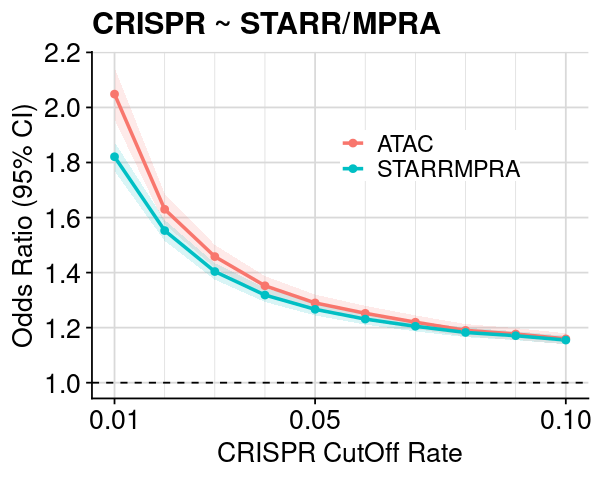

In [33]:
### init
dat = dat_logit_stats_pool
dat = dat %>% dplyr::filter(CutOff_CRISPR <= 0.1, Assay_CRISPR == "CRISPR")

### set grid lines
vec_num_break_total = seq(0, 0.1, 0.01)
vec_num_break_major = c(0.01, 0.05, 0.10)
vec_num_break_minor = setdiff(vec_num_break_total, vec_num_break_major)

### generate plot
gpt = ggplot(dat, aes(x = CutOff_CRISPR, y = OR, group = Assay_STARRMPRA, color = Assay_STARRMPRA)) +
    geom_ribbon(
        aes(ymin = OR_CI_Lower, ymax = OR_CI_Upper, fill = Assay_STARRMPRA), 
        alpha = 0.15, 
        color = NA
    ) +
    geom_line(linewidth = 1) +
    geom_point(size = 1.8) +
    geom_hline(yintercept = 1, linetype = "dashed") +
    scale_x_continuous(
        breaks = vec_num_break_major,
        labels = scales::label_number(accuracy = 0.01),
        minor_breaks = vec_num_break_minor
    ) +
    scale_y_continuous(breaks = scales::pretty_breaks()) +
    theme_cowplot() +
    background_grid(major = "xy", minor = "x") +
    labs(x="CRISPR CutOff Rate", y = "Odds Ratio (95% CI)", title = "CRISPR ~ STARR/MPRA") +
    guides(fill = "none", color = guide_legend(title = NULL)) +
    theme(
        legend.background = element_rect(fill="white"),
        legend.position   = "inside",
        legend.position.inside = c(0.5, 0.7)
    ) +
    THEME_TEXT

### assign and show
gpt_export_logit_pool = gpt
options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

**Export plots**

In [34]:
plt_export = gpt_export_logit_pool
txt_export = "fig.region_coverage_fcc.logit.odds_ratio.pool"
num_height = 4
num_width  = 5

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

## Plot odds ratio for split STARR/MPRA

**Split data table by CRISPR cutoff rate**

In [38]:
### split by cutoff rate
dat = dat_logit_stats_pool
dat = dat %>% dplyr::mutate(CutOff_CRISPR = as.character(CutOff_CRISPR))
lst = split(dat, dat$CutOff_CRISPR)

### assign and show
lst_dat_logit_stats_pool = lst
dat = lst[[1]]
fun_display_table(head(dat, 3))

CutOff_CRISPR,Assay_CRISPR,Assay_STARRMPRA,OR,OR_CI_Lower,OR_CI_Upper,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Total,Count
0.01,CRISPRi-HCRFF,ATAC,2.378547,1.747075,3.238262,0.3763118,0.2423115,0.5103121,0,5319,1330
0.01,CRISPRi-HCRFF,STARRMPRA,1.817318,1.490459,2.215858,0.2594310,0.1733200,0.3455420,0,5319,3989
0.01,CRISPRi-Growth,ATAC,2.040152,1.946319,2.138509,0.3096625,0.2892139,0.3301110,0,294769,80288


In [39]:
### split by cutoff rate
dat = dat_logit_stats_split
dat = dat %>% dplyr::mutate(CutOff_CRISPR = as.character(CutOff_CRISPR))
lst = split(dat, dat$CutOff_CRISPR)

### assign and show
lst_dat_logit_stats_split = lst
dat = lst[[1]]
fun_display_table(head(dat, 3))

CutOff_CRISPR,Assay_CRISPR,Assay_STARRMPRA,OR,OR_CI_Lower,OR_CI_Upper,Log10OR,Log10OR_CI_Lower,Log10OR_CI_Upper,Pvalue,Total,Count
0.01,CRISPRi-HCRFF,ATAC,2.378547,1.747075,3.238262,0.3763118,0.2423115,0.5103121,0.00e+00,5319,1330
0.01,CRISPRi-HCRFF,ASTARR,2.065837,1.475816,2.891744,0.3150961,0.1690322,0.4611599,2.36e-05,5319,1330
0.01,CRISPRi-HCRFF,WSTARR,1.860945,1.363876,2.539171,0.2697334,0.1347750,0.4046919,8.96e-05,5319,1306


**Check: order of STARR/MPRA/ATAC assay**

In [19]:
VEC_TXT_ASSAY_INP

ASTARR   WSTARR    LMPRA    TMPRA     ATAC 
"ASTARR" "WSTARR"  "LMPRA"  "TMPRA"   "ATAC"

**Helper function**

In [20]:
fun_inner = function(num){
    if (num > 1000) {
        txt = round(num / 1000, 1)
        txt = paste0(txt, "k")
    } else {
        txt = as.character(num)
    }
    return(txt)
}

fun_wrapper = function(vec){
    vec = sapply(vec, fun_inner)
    return(vec)
}

**Generate plot**

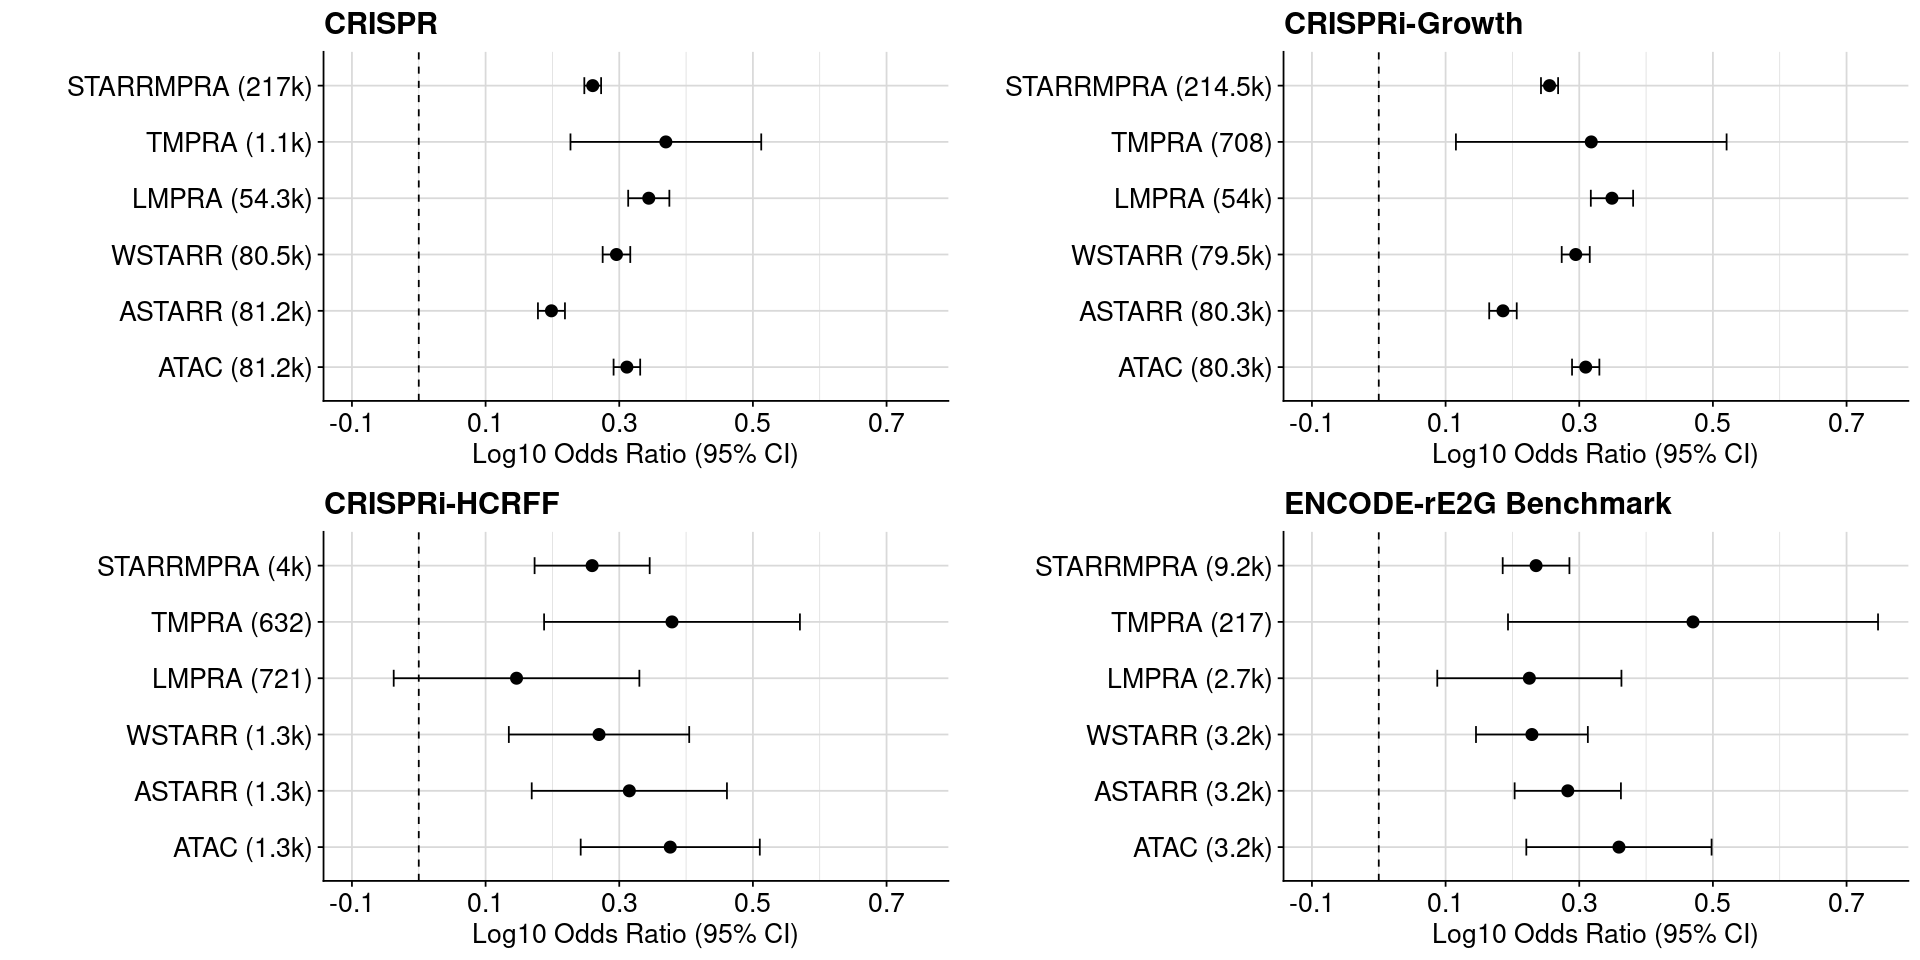

In [42]:
### choose threshold
idx = "0.01"

### get logit (pool) results based on the chosen cutoff rate
lst = lst_dat_logit_stats_pool
dat = lst[[idx]]
tmp = dat %>% dplyr::filter(Assay_STARRMPRA == "STARRMPRA")

### get logit (split) results based on the chosen cutoff rate
lst = lst_dat_logit_stats_split
dat = lst[[idx]]
dat = bind_rows(dat, tmp)

### generate plot
lst = split(dat, dat$Assay_CRISPR)
lst = lapply(lst, function(dat){
    vec = c("STARRMPRA", VEC_TXT_ASSAY_INP)
    txt = unique(dat$Assay_CRISPR)
    
    dat = dat %>% 
        dplyr::mutate(Assay_STARRMPRA = factor(Assay_STARRMPRA, levels=vec)) %>%
        dplyr::mutate(Count_Label = fun_wrapper(Count)) %>%
        dplyr::mutate(Assay_Label = paste0(Assay_STARRMPRA, " (", Count_Label, ")")) %>%
        dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

    gpt = ggplot(dat, aes(x = Log10OR, y = Assay_Label)) +
        geom_point(size = 3) +
        geom_errorbarh(aes(xmin = Log10OR_CI_Lower, xmax = Log10OR_CI_Upper), height = 0.3) +
        geom_vline(xintercept = 0, linetype="dashed") +
        labs(x = "Log10 Odds Ratio (95% CI)", y = "", title = txt) +
        theme_cowplot() +
        background_grid() 
    return(gpt)
})

### setup grid lines
vec_num_break_total = seq(-0.1, 0.8, 0.1)
vec_num_break_major = seq(-0.1, 0.8, 0.2)
vec_num_break_minor = setdiff(vec_num_break_total, vec_num_break_major)

### update plots
lst = lapply(lst, function(gpt){
    ### udpate text style
    gpt = gpt +
        theme(
            strip.text = element_text(face = "bold"),
            axis.text.y = element_text(size = 11)
        ) +
        THEME_TEXT

    ### udpate x breaks, labels, and grid line
    gpt = gpt + 
        scale_x_continuous(
            breaks = vec_num_break_major,
            labels = scales::label_number(accuracy = 0.1),
            minor_breaks = vec_num_break_minor,
            limits = c(-0.1, 0.75)
        ) +
        background_grid(major = "xy", minor = "x")
    return(gpt)
})

### generate plot
plt = plot_grid(plotlist = lst, align = "v")


### assign and show
plt_export_logit_split = plt
options(repr.plot.height=8, repr.plot.width=16)
print(plt)

**Export plots**

In [43]:
plt_export = plt_export_logit_split
txt_export = "fig.region_coverage_fcc.logit.odds_ratio.split"
num_height = 8
num_width  = 16

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")